In [1]:

import os
import numpy as np
import pandas as pd


py_list = [1, 2, 3]
py_tuple = ('a', 'b', 'c')
py_dict = {'ID': [1,2,3], 'Name': ['Alice','Bob','Carol']}

# Convert to pandas
s_from_list = pd.Series(py_list, name='numbers')
s_from_tuple = pd.Series(py_tuple, name='letters')
df_from_dict = pd.DataFrame(py_dict)

print("Series from list:\n", s_from_list)
print("\nSeries from tuple:\n", s_from_tuple)
print("\nDataFrame from dict:\n", df_from_dict)

# 4) Load small dataset (attempt students.csv fallback to sample)
csv_path = "students.csv"
if os.path.exists(csv_path):
    students = pd.read_csv(csv_path)
else:
    students = pd.DataFrame({
        'ID':[1,2,3,4,5],
        'Name':['Alice','Bob','Carol','Dave','Eve'],
        'Age':[20,21,19,22,20],
        'Course':['Python Programming','Data Science','Python Programming','Math','Data Science'],
        'Marks':[85, 67, np.nan, 45, 92]
    })

print("\nFirst 5 rows:\n", students.head())
print("\nLast 5 rows:\n", students.tail())
print("\nShape (rows, cols):", students.shape)
print("Columns:", students.columns.tolist())


Series from list:
 0    1
1    2
2    3
Name: numbers, dtype: int64

Series from tuple:
 0    a
1    b
2    c
Name: letters, dtype: object

DataFrame from dict:
    ID   Name
0   1  Alice
1   2    Bob
2   3  Carol

First 5 rows:
    ID   Name  Age              Course  Marks
0   1  Alice   20  Python Programming   85.0
1   2    Bob   21        Data Science   67.0
2   3  Carol   19  Python Programming    NaN
3   4   Dave   22                Math   45.0
4   5    Eve   20        Data Science   92.0

Last 5 rows:
    ID   Name  Age              Course  Marks
0   1  Alice   20  Python Programming   85.0
1   2    Bob   21        Data Science   67.0
2   3  Carol   19  Python Programming    NaN
3   4   Dave   22                Math   45.0
4   5    Eve   20        Data Science   92.0

Shape (rows, cols): (5, 5)
Columns: ['ID', 'Name', 'Age', 'Course', 'Marks']


In [7]:
# Q2: Data cleaning & wrangling
import pandas as pd
import numpy as np

df = students.copy()

# 1. Handle missing values
print("Null counts before:\n", df.isnull().sum())

# Replace missing Marks with mean
df['Marks'] = df['Marks'].fillna(df['Marks'].mean())

# Drop rows where Course is missing
df = df.dropna(subset=['Course'])

# 2. Handle duplicates
# Add a duplicate for demonstration
df_dup = pd.concat([df, df.iloc[[0]]], ignore_index=True)

print("Before dropping duplicates:", df_dup.shape)

df_dup = df_dup.drop_duplicates()
print("After dropping duplicates:", df_dup.shape)

# 3. Data transformation
df_dup['Course'] = df_dup['Course'].str.lower()
df_dup['Result'] = df_dup['Marks'].apply(lambda x: "Pass" if x >= 40 else "Fail")
df_dup['Age'] = df_dup['Age'].astype(int)

print("\nCleaned data:\n", df_dup)


Null counts before:
 ID        0
Name      0
Age       0
Course    0
Marks     1
dtype: int64
Before dropping duplicates: (6, 5)
After dropping duplicates: (5, 5)

Cleaned data:
    ID   Name  Age              Course  Marks Result
0   1  Alice   20  python programming  85.00   Pass
1   2    Bob   21        data science  67.00   Pass
2   3  Carol   19  python programming  72.25   Pass
3   4   Dave   22                math  45.00   Pass
4   5    Eve   20        data science  92.00   Pass


In [8]:
# ✅ Updated Q2 code (no append)
import pandas as pd
import numpy as np

df = students.copy()

print("Null counts before:\n", df.isnull().sum())

df['Marks'] = df['Marks'].fillna(df['Marks'].mean())

df = df.dropna(subset=['Course'])

df_dup = pd.concat([df, df.iloc[[0]]], ignore_index=True)

print("Before dropping duplicates:", df_dup.shape)
df_dup = df_dup.drop_duplicates()
print("After dropping duplicates:", df_dup.shape)

df_dup['Course'] = df_dup['Course'].str.lower()
df_dup['Result'] = df_dup['Marks'].apply(lambda x: "Pass" if x >= 40 else "Fail")
df_dup['Age'] = df_dup['Age'].astype(int)

print("\nCleaned data:\n", df_dup)


Null counts before:
 ID        0
Name      0
Age       0
Course    0
Marks     1
dtype: int64
Before dropping duplicates: (6, 5)
After dropping duplicates: (5, 5)

Cleaned data:
    ID   Name  Age              Course  Marks Result
0   1  Alice   20  python programming  85.00   Pass
1   2    Bob   21        data science  67.00   Pass
2   3  Carol   19  python programming  72.25   Pass
3   4   Dave   22                math  45.00   Pass
4   5    Eve   20        data science  92.00   Pass


In [14]:
# ✅ Add Result column before Q4
df['Result'] = df['Marks'].apply(lambda x: "Pass" if x >= 40 else "Fail")


In [15]:
# ✅ Q4: Descriptive Statistics
print("Describe:\n", df.describe(include='all'))

avg_age = df['Age'].mean()
max_marks = df['Marks'].max()
min_marks = df['Marks'].min()
most_common_course = df['Course'].mode().iloc[0]

print(f"\nAverage Age: {avg_age}")
print(f"Max Marks: {max_marks}, Min Marks: {min_marks}")
print(f"Most Common Course: {most_common_course}")

# Value counts
students_per_course = df['Course'].value_counts()
pass_fail_counts = df['Result'].value_counts()

print("\nStudents per Course:\n", students_per_course)
print("\nPass/Fail counts:\n", pass_fail_counts)


Describe:
               ID   Name        Age              Course      Marks Result
count   5.000000      5   5.000000                   5   5.000000      5
unique       NaN      5        NaN                   3        NaN      1
top          NaN  Alice        NaN  Python Programming        NaN   Pass
freq         NaN      1        NaN                   2        NaN      5
mean    3.000000    NaN  20.400000                 NaN  72.250000    NaN
std     1.581139    NaN   1.140175                 NaN  18.184815    NaN
min     1.000000    NaN  19.000000                 NaN  45.000000    NaN
25%     2.000000    NaN  20.000000                 NaN  67.000000    NaN
50%     3.000000    NaN  20.000000                 NaN  72.250000    NaN
75%     4.000000    NaN  21.000000                 NaN  85.000000    NaN
max     5.000000    NaN  22.000000                 NaN  92.000000    NaN

Average Age: 20.4
Max Marks: 92.0, Min Marks: 45.0
Most Common Course: Data Science

Students per Course:
 Cours

In [13]:
print(df.columns)
print(df.head())


Index(['ID', 'Name', 'Age', 'Course', 'Marks'], dtype='object')
   ID   Name  Age              Course  Marks
0   1  Alice   20  Python Programming  85.00
1   2    Bob   21        Data Science  67.00
2   3  Carol   19  Python Programming  72.25
3   4   Dave   22                Math  45.00
4   5    Eve   20        Data Science  92.00


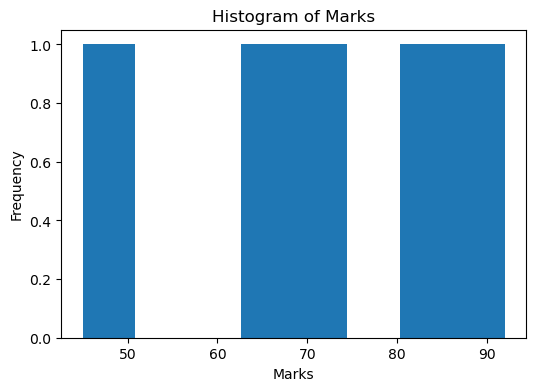

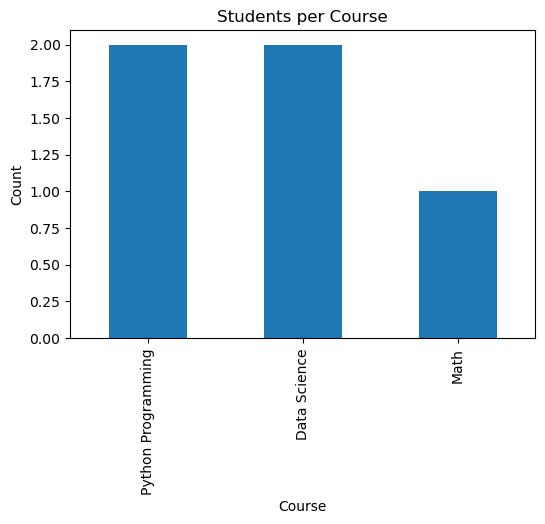

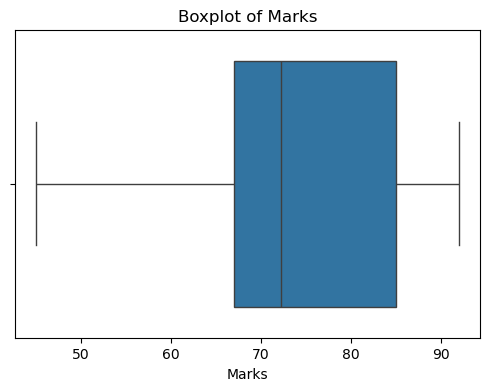

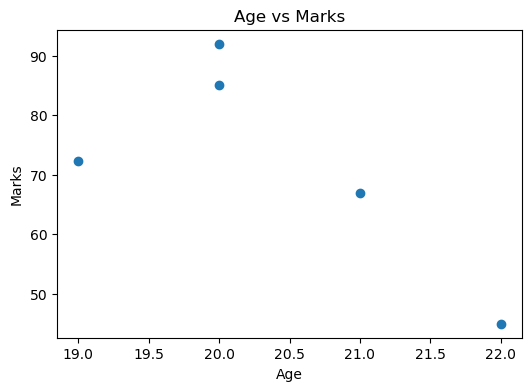

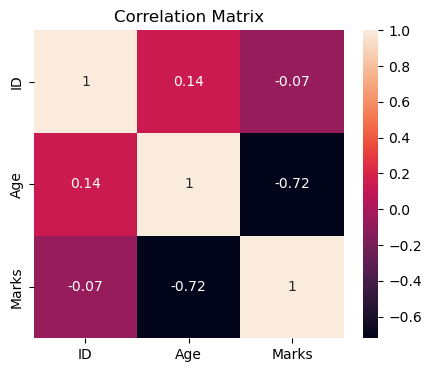

In [17]:
# Q5: Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = df.copy()  # ✅ fix

# Histogram of marks
plt.figure(figsize=(6,4))
plt.hist(df['Marks'], bins=8)
plt.title('Histogram of Marks')
plt.xlabel('Marks')
plt.ylabel('Frequency')
plt.show()

# Bar chart number of students per course
plt.figure(figsize=(6,4))
df['Course'].value_counts().plot(kind='bar')
plt.title('Students per Course')
plt.ylabel('Count')
plt.show()

# Boxplot distribution of marks
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Marks'])
plt.title('Boxplot of Marks')
plt.show()

# Scatter Age vs Marks
plt.figure(figsize=(6,4))
plt.scatter(df['Age'], df['Marks'])
plt.xlabel('Age')
plt.ylabel('Marks')
plt.title('Age vs Marks')
plt.show()

# Correlation heatmap of numeric features
plt.figure(figsize=(5,4))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        5 non-null      int64  
 1   app_name       5 non-null      object 
 2   usage_minutes  5 non-null      int64  
 3   rating         5 non-null      float64
 4   category       5 non-null      object 
dtypes: float64(1), int64(2), object(2)
memory usage: 332.0+ bytes
None


<Figure size 640x480 with 0 Axes>

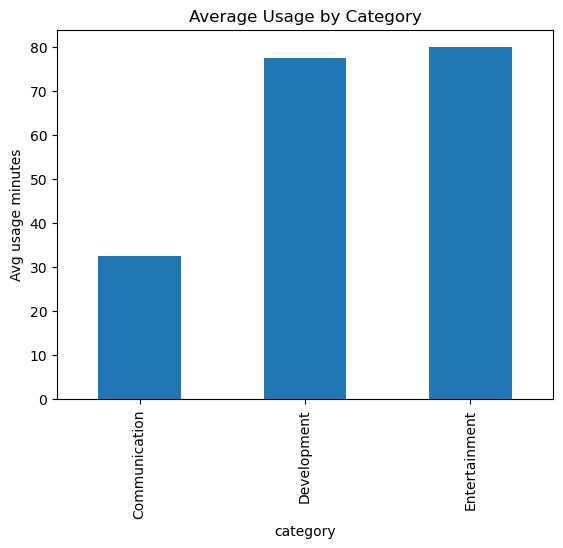

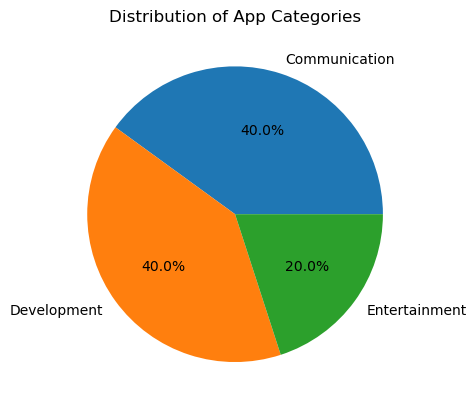

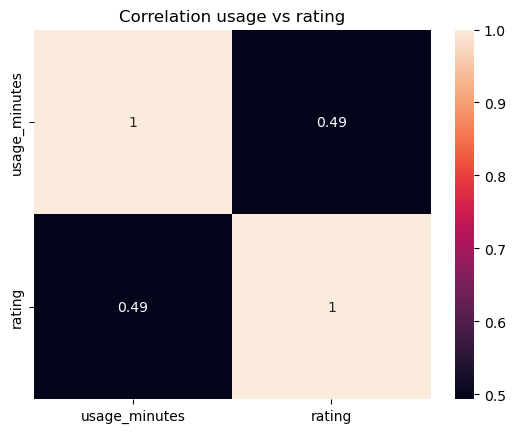

Three insights:
1) Highest usage app category: {'category': 'Entertainment', 'usage_minutes': 80.0}
2) Apps with rating>4 and usage>30 minutes:
    user_id app_name  usage_minutes  rating       category
0        1     Zoom             45     4.6  Communication
2        3   VSCode            120     4.9    Development
3        4  Jupyter             35     4.3    Development
3) Correlation between usage and rating: 0.4933693402088446


In [18]:
# Q6: Example EDA on app_usage
# If app_usage.csv exists, load; else create example
csv_path = "app_usage.csv"
if os.path.exists(csv_path):
    app = pd.read_csv(csv_path)
else:
    app = pd.DataFrame({
        'user_id':[1,2,3,4,5],
        'app_name':['Zoom','Slack','VSCode','Jupyter','Spotify'],
        'usage_minutes':[45, 20, 120, 35, 80],
        'rating':[4.6,4.1,4.9,4.3,3.9],
        'category':['Communication','Communication','Development','Development','Entertainment']
    })

print(app.info())
# Clean nulls/duplicates
app = app.drop_duplicates().dropna()

# Filter apps with rating > 4.0 and usage > 30 minutes
filtered = app[(app['rating']>4.0) & (app['usage_minutes']>30)]

# Group: average usage time per category
avg_usage_category = app.groupby('category')['usage_minutes'].mean().reset_index()

# Visuals: bar, pie, heatmap
import matplotlib.pyplot as plt
plt.figure()
avg_usage_category.set_index('category').plot(kind='bar', legend=False)
plt.title('Average Usage by Category')
plt.ylabel('Avg usage minutes')
plt.show()

plt.figure()
app.groupby('category')['user_id'].count().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of App Categories')
plt.ylabel('')
plt.show()

# Correlation heatmap
plt.figure()
sns.heatmap(app[['usage_minutes','rating']].corr(), annot=True)
plt.title('Correlation usage vs rating')
plt.show()

# Conclusions (example)
print("Three insights:")
print("1) Highest usage app category:", avg_usage_category.sort_values('usage_minutes', ascending=False).iloc[0].to_dict())
print("2) Apps with rating>4 and usage>30 minutes:\n", filtered)
print("3) Correlation between usage and rating:", app['usage_minutes'].corr(app['rating']))
